In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the Data

**bold text**#Cleaning Up the Empty Values

In [ ]:

from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data',
                     names = ["BI-RADS assessment: 1 to 5", "Age", "Shape", "Margin", "Density", "Severity"])
df

,BI-RADS assessment: 1 to 5,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [ ]:
df.drop(df.loc[df['BI-RADS assessment: 1 to 5']=='?'].index, inplace=True)
df.drop(df.loc[df['Age']=='?'].index, inplace=True)
df.drop(df.loc[df['Shape']=='?'].index, inplace=True)
df.drop(df.loc[df['Margin']=='?'].index, inplace=True)
df.drop(df.loc[df['Density']=='?'].index, inplace=True)
df


,BI-RADS assessment: 1 to 5,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [ ]:
sorted = df.sort_values(by =['Age'], ascending = True)
sorted

,BI-RADS assessment: 1 to 5,Age,Shape,Margin,Density,Severity
463,4,18,1,1,3,0
182,4,19,1,1,3,0
711,4,19,1,1,3,0
847,4,19,3,1,3,0
869,4,19,1,1,3,0
...,...,...,...,...,...,...
458,5,87,4,5,3,1
797,5,87,4,4,3,1
360,4,88,4,4,3,1
616,5,93,1,5,3,1


#Splitting the Data

In [ ]:
y = df['Severity']
y

0      1
2      1
3      0
8      1
10     1
      ..
956    0
957    1
958    0
959    1
960    0
Name: Severity, Length: 830, dtype: int64

In [ ]:
X = df.drop('Severity', axis=1)
X

,BI-RADS assessment: 1 to 5,Age,Shape,Margin,Density
0,5,67,3,5,3
2,5,58,4,5,3
3,4,28,1,1,3
8,5,57,1,5,3
10,5,76,1,4,3
...,...,...,...,...,...
956,4,47,2,1,3
957,4,56,4,5,3
958,4,64,4,5,3
959,5,66,4,5,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X_train

,BI-RADS assessment: 1 to 5,Age,Shape,Margin,Density
850,4,37,2,1,2
336,5,75,4,3,3
888,5,66,4,3,3
904,4,62,4,5,3
897,5,67,4,3,3
...,...,...,...,...,...
86,5,58,4,4,3
444,4,69,1,5,3
135,5,46,4,5,3
922,4,27,2,1,3


In [ ]:
X_test

,BI-RADS assessment: 1 to 5,Age,Shape,Margin,Density
841,4,67,1,1,3
836,4,42,2,1,3
905,4,46,1,1,3
31,5,54,4,4,3
748,5,62,4,3,3
...,...,...,...,...,...
225,4,40,3,4,3
856,4,56,2,4,3
813,4,59,2,1,3
817,4,44,1,1,3


#Random Forest Classification -- 86.14%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = "gini",
                             max_depth = 4,
                             min_samples_split =15,
                             random_state=5)


In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=15, random_state=5)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8674698795180723

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.82089552, 0.86567164, 0.74626866, 0.82089552, 0.84848485,
       0.8030303 , 0.78787879, 0.8030303 , 0.86363636, 0.84848485])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88        97
           1       0.80      0.88      0.84        69

    accuracy                           0.86       166
   macro avg       0.86      0.86      0.86       166
weighted avg       0.87      0.86      0.86       166



In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
from sklearn.model_selection import validation_curve
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curve - Random Forest", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

In [ ]:
param_range = np.arange(3, 15, 3)
plot_validation_curves(rfc, X_train, y_train, "max_depth", param_range, 2)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


<Axes: >

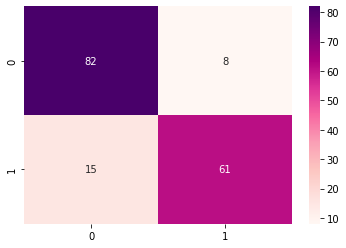

In [ ]:
sns.heatmap(cm, cmap = "RdPu", annot = True)

#Support Vector Machine -- 86.14%

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svm.predict(X_test)

svm.score(X_test, y_test)


0.8614457831325302

In [ ]:
svm.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
svm.score(X_test, y_test)

0.8614457831325302

In [ ]:
krn = ['linear', 'rbf', 'poly', 'sigmoid']
rng_C = np.arange(1,52,10)
rng_deg = np.arange(3,8)
rng_co = np.arange(0.001, 10, 0.5)
rng_gam = ['auto', 'scale']

In [ ]:
svm.score(X_test, y_test)

0.8614457831325302

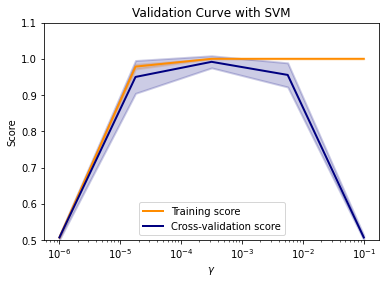

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)
subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.5, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

#Logistic Regression -- 83.73%

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
log = LogisticRegression(solver='liblinear', random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
log.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
log.score(X_test, y_test)

0.8373493975903614

#Decision Tree -- 82.53%

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
clf.score(X_test, y_test)

0.8313253012048193

# Gaussian Naive Bayes -- 81.33%

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb.predict(X_test)
gnb.score(X_test, y_test)

0.8132530120481928

# Multinomial Bayesian -- 75.3%

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
mnb.predict(X_test)
mnb.score(X_test, y_test)

0.7530120481927711

#Complement Bayesian -- 74.7%

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

In [ ]:
cnb.predict(X_test)
cnb.score(X_test, y_test)

0.7469879518072289

#Bernoulli Naive Bayes -- 74.7%


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = ComplementNB()
bnb.fit(X_train, y_train)

ComplementNB()

In [ ]:
bnb.predict(X_test)
bnb.score(X_test, y_test)

0.7469879518072289

#Categorical Naive Bayes -- 74.7%


In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
cat = ComplementNB()
cat.fit(X_train, y_train)

ComplementNB()

In [ ]:
cat.predict(X_test)
cat.score(X_test, y_test)

0.7469879518072289

#K Nearest Neighbor -- 84.34%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knc.predict(X_test)
knc.score(X_test, y_test)

0.8433734939759037

#K Nearest Neighbor Pt. 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred=knc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        90
           1       0.85      0.80      0.82        76

    accuracy                           0.84       166
   macro avg       0.84      0.84      0.84       166
weighted avg       0.84      0.84      0.84       166

[[79 11]
 [15 61]]


In [ ]:
knn_params = {
    "n_neighbors": range(1,30,2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkow"],
    "leaf_size": range(1,50,5)
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=knc, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_results = grid_search.fit(X_train, y_train)

final_model = knc.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid.results.best_params_)

KeyboardInterrupt: ignored

In [ ]:
final_model.score(y_test,y_pred)